# Homework #2 
Josh Cohen
Questions: 4.1,4.2,4.5, 5.2,5.9

In [256]:
import numpy as np
import sympy as sym
%matplotlib notebook
from matplotlib import pyplot as plt
import pandas as pd

## Probelm 4.1

**c).**

In [187]:
a = sym.MatrixSymbol('a', 1, 1)
b = sym.MatrixSymbol('b', 2, 1)
C = sym.MatrixSymbol('C', 2, 2)
# w1, w2 = sym.symbols('w_1 w_2')
w = sym.MatrixSymbol('w', 2, 1)
g = a + b.T * w + w.T * C * w
grad_g = g.diff(w)
grad_2_g = grad_g.diff(w)

In [196]:
print("with a g(w) of:")
display(g)
print("gradient g'(w) of:")
display(grad_g)
print("g''(w) of:")
display(sym.factor(grad_2_g.subs({C.T: C})))

with a g(w) of:


a + b.T*w + w.T*C*w

gradient g'(w) of:


C*w + b + C.T*w

g''(w) of:


2*C

In [242]:
C_act = sym.Matrix([[1,1],[1,1]])
C_act = sym.Matrix(sym.factor(grad_2_g.subs({C.T: C})).subs({C:C_act}))
print("therefore the second order derivative of our function is:")
display(C_act)
print("with eigen values of:")
eig_vals = C_act.eigenvals(multiple = True)
print(eig_vals)
print("since the eigen values of C are >= to 0 we can verify that the quadaratic function is convex")

therefore the second order derivative of our function is:


Matrix([
[2, 2],
[2, 2]])

with eigen values of:
[0, 4]
since the eigen values of C are >= to 0 we can verify that the quadaratic function is convex


**d).**

In [ ]:
C = sym.MatrixSymbol()

## Problem 4.2

## Problem 4.5

**a).** use 1st order optimality condition to determine the unique stationary point of $g(w) = \log(1+e^{w^Tw})$ where $w$ is 2D

In [245]:
w1, w2 = sym.symbols('w_1 w_2')
w = sym.Matrix([w1, w2])
g = sym.log(1 + sym.exp(w.T * w)[0])
grad_g = sym.Matrix([g]).jacobian(w)
ans = sym.solve(grad_g, w)
display(ans)

[(0, 0)]

In [246]:
display(g)
display(grad_g)

log(exp(w_1**2 + w_2**2) + 1)

Matrix([[2*w_1*exp(w_1**2 + w_2**2)/(exp(w_1**2 + w_2**2) + 1), 2*w_2*exp(w_1**2 + w_2**2)/(exp(w_1**2 + w_2**2) + 1)]])

Therefore it can be seen the first order optimality condition is satisfied at $w = (0,0)$

**b).** use second order defitionition of convexity to verify that g(w) is convex and thereore the stationary point is the global minimum

In [247]:
grad_2_g = grad_g.jacobian(w)
P, D = grad_2_g.diagonalize()

In [248]:
display(D)

Matrix([
[2*exp(w_1**2 + w_2**2)/(exp(w_1**2 + w_2**2) + 1),                                                                                                                               0],
[                                                0, 2*(2*w_1**2 + 2*w_2**2 + exp(w_1**2 + w_2**2) + 1)*exp(w_1**2 + w_2**2)/(2*exp(w_1**2 + w_2**2) + exp(2*w_1**2 + 2*w_2**2) + 1)]])

Therefore since $e^x$ can never be < 0, from the work done in 4.1 and 4.2 we can show that the NxN symmetric Hessian matrix will never be < 0, therefore the function is convex everywhere and the minima we found in part **a).** is the global minimum

**c).** Perform Newton's method to find the minimum of g(w) determined in part **a).**, initialize $w_0 = 1_{Nx1}$ plot the cost function over 10 iterations

In [249]:
cost_func = sym.lambdify([w], g)
grad = sym.lambdify([w], grad_g)
grad_2 = sym.lambdify([w], grad_2_g)
w_0_c = np.ones(2)

In [250]:
#define function that we will use for gradient descent
def grad_desc(w_last):
    num_its = 10
    cost_vals = np.zeros(num_its)
    grad_g_last = grad(w_last) 
    grad_2_g_last = grad_2(w_last)
    cost_vals[0] = cost_func(w_last)
#     print(cost_func(w_last))
#     print(grad_2_g_last.shape)
#     print(grad_g_last.T.shape)
    for x in range(1, num_its):
        w_next = w_last - np.matmul(np.linalg.inv(grad_2_g_last), grad_g_last.T)[0]
        cost_vals[x] = cost_func(w_next)
        w_last = w_next
        grad_g_last = grad(w_last) 
        grad_2_g_last = grad_2(w_last)
    return cost_vals

<IPython.core.display.Javascript object>


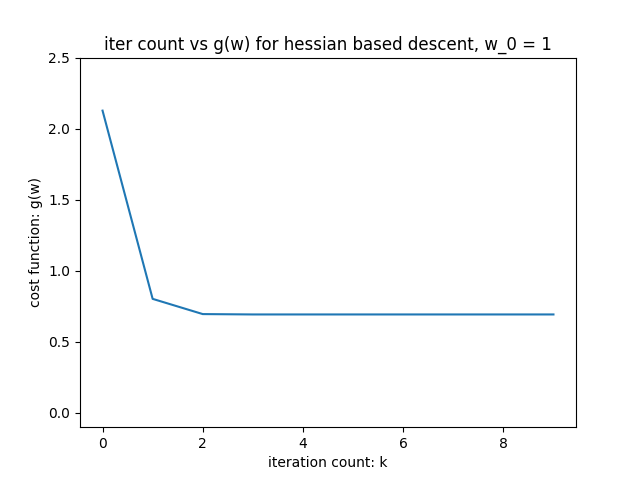

In [255]:
cost_vals = grad_desc(w_0_c)
plt.figure()
it_vec = np.arange(10)
plt.plot(it_vec, cost_vals)
plt.xlabel("iteration count: k")
plt.ylabel("cost function: g(w)")
plt.ylim([-0.1,2.5])
plt.title("iter count vs g(w) for hessian based descent, w_0 = 1")
plt.show()

**d).** Run code from **c).** again with intiial guess at $w_0 = 4 * 1_{Nx1}$, explain behavior

<IPython.core.display.Javascript object>


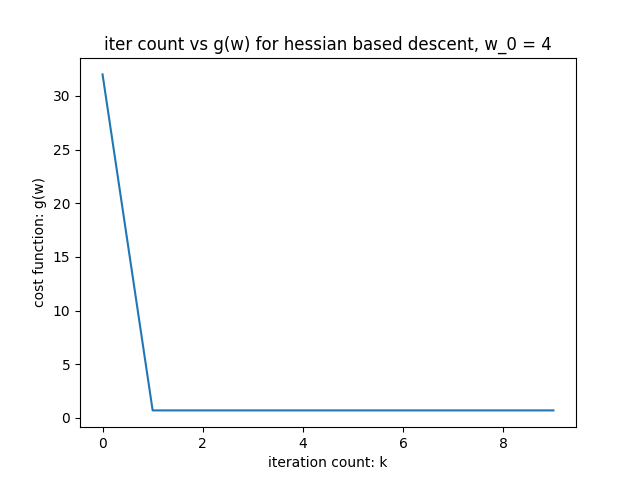

In [244]:
w_0_d = np.ones(2) * 4
cost_vals = grad_desc(w_0_d)
plt.figure()
it_vec = np.arange(10)
plt.plot(it_vec, cost_vals)
plt.xlabel("iteration count: k")
plt.ylabel("cost function: g(w)")
plt.title("iter count vs g(w) for hessian based descent, w_0 = 4")
plt.show()

**why does this result make sense for our $g(w)$?**
Since our g(w) is a quadratic it makes sense that our second order update rule converges quickly, the one with the greater initial error will then have (due to its globally convex nature) a steeper initial descent which will allow for it to converge quicker and closer to the actual solution

## Problem 5.2

**a).** fit linear model to dataset: *kleibers_law_data.csv*

In [470]:
#read in data
kliebers_df = pd.read_csv("kleibers_law_data.csv", header=None, index_col=None)
P = kliebers_df.shape[1]
x_vals = kliebers_df.iloc[0,:]
y_vals = kliebers_df.iloc[1,:]
#define symbolic cost function
b, w, xp, yp, p = sym.symbols('b, w xp yp p')
w_tilda = sym.Matrix([b, w])
xp_gen = sym.lambdify(x_sym,sym.Matrix([1, x_sym]))
yp_gen = sym.lambdify(y_sym, sym.Matrix([y_sym]))

#to perform gradient descent calculate A and b_vec
Ap = sym.lambdify(xp, (xp_gen(xp) * xp_gen(xp).T))
bp = sym.lambdify((xp, yp), xp_gen(xp) * yp_gen(yp)) 
A = np.zeros((2,2))
b = np.zeros((2,1))
for (xp,yp) in zip (np.log(x_vals.iloc[1:]), np.log(y_vals.iloc[1:])):
    A = A + Ap(xp)
    b = b + bp(xp,yp)


In [471]:
display(A)
display(b)

array([[ 1497.        , -2644.10450903],
       [-2644.10450903, 14575.33617811]])

array([[ 8474.33295994],
       [-8512.73814967]])

In [472]:
A_inv = np.linalg.inv(A)
w_star = np.matmul(A_inv,b)
display(w_star)

array([[6.8119607 ],
       [0.65170352]])

In [473]:
w_star[1][0]

0.6517035173670688

<IPython.core.display.Javascript object>


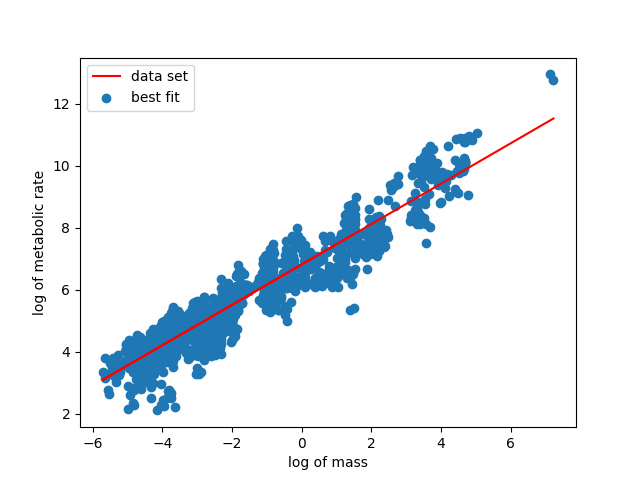

In [477]:
plt.figure()
ax = plt.gca()
plt.ylabel("log of metabolic rate")
plt.xlabel("log of mass")
plt.scatter(np.log(x_vals), np.log(y_vals))

#plot our fitted line
log_xs = np.log(x_vals)
log_ys = w_star[1][0] * log_xs + w_star[0][0] 
plt.plot(log_xs, log_ys, 'r')

plt.legend(["data set", "best fit"])

plt.show()

**b)..** right out nonlinear relationship between mass $x$ and metabolic rate $y$

In [480]:
slope = w_star[1][0]
intercept = w_star[0][0]
print("best fit parameters for:\n\rm: {}\r\nb: {}".format(slope, intercept))

best fit parameters for:
m: 0.6517035173670688
b: 6.811960700573648


writing this out as a non-linearized equation:
$$y_p = e^{w_0 + \log{x_p}w_1}$$
or
$$y_p = e^{w_0}x_p^{w_1}$$

**c).** plug in a amass of 10kg to find out how many calories a 10kg animal needs daily

In [513]:
animal_mass = 10 #in kg 
daily_cals = np.exp(intercept) * animal_mass**slope * 1000/4.18 #in cal/day

In [521]:
print("There for the 10kg animal needs: {:.2f} calories daily;\nHowever, in our 'calorie' which is infact a kilocalorie this number is: {:.2f} 'calories' a day".format(daily_cals, daily_cals/1000))

There for the 10kg animal needs: 974819.43 calories daily;
However, in our 'calorie' which is infact a kilocalorie this number is: 974.82 'calories' a day


## Problem 5.9

Standardize and normalize quality metrics, verify example 5.5 and 5.6

In [526]:
#read in data
boston_housing_df = pd.read_csv("boston_housing.csv", header=None, index_col=None).dropna(axis=1)
auto_data_df = pd.read_csv("auto_data.csv", header=None, index_col=None).dropna(axis=1)

In [609]:
#standardize and normalize
bh_mean = boston_housing_df.mean(axis = 1)
ad_mean = auto_data_df.mean(axis=1)
bh_std = boston_housing_df.std(axis=1)
ad_std = auto_data_df.std(axis=1)

bh_std_norm = boston_housing_df.sub(bh_mean, axis=0).div(bh_std, axis=0)
ad_std_norm = auto_data_df.sub(ad_mean, axis=0).div(ad_std, axis=0)

In [709]:
def get_best_fit(df):
    inputs = df.iloc[:-1,:]
    output = df.iloc[-1,:]
    N, P = inputs.shape
    b, yp_sym = sym.symbols('b yp')
    w = sym.MatrixSymbol('w', N, 1).as_explicit() #first element is b
    w_tilda = sym.Matrix([b, w])
    xp_sym = sym.MatrixSymbol('x', N,1)
    xp_gen = sym.lambdify([xp_sym],sym.Matrix([sym.Matrix([1]), xp_sym]))
    yp_gen = sym.lambdify(yp_sym, sym.Matrix([yp_sym]))
    #to perform gradient descent calculate A and b_vec
#     Ap = sym.lambdify([xp_sym], (sym.MatMul(xp_gen(xp_sym),xp_gen(xp_sym).T)))
    bp = sym.lambdify(([xp_sym], yp_sym), xp_gen(xp_sym) * yp_gen(yp_sym)) 
    A = np.zeros((N+1,N+1))
    b = np.zeros((N+1,1))
    for i in range(1,P):
        xp = xp_gen(np.expand_dims(inputs.iloc[:,i].to_numpy(),1))
        yp = output.iloc[i]
        A = A + np.matmul(xp,xp.T)
        b = b + xp * yp
        
    A_inv = np.linalg.inv(A)
    w_star = np.matmul(A_inv, b)
    return w_star

In [711]:
w_star = get_best_fit(bh_std_norm)

In [724]:
x_real = np.concatenate((np.ones((506,1)).T, bh_std_norm.iloc[:-1,:].to_numpy()))

array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
         1.        ,  1.        ],
       [-0.41730039, -0.41485878, -0.4148611 , ..., -0.41096779,
        -0.40528775, -0.41252069],
       [ 0.28454827, -0.48724019, -0.48724019, ..., -0.48724019,
        -0.48724019, -0.48724019],
       ...,
       [-1.45755797, -0.3027945 , -0.3027945 , ...,  1.17530274,
         1.17530274,  1.17530274],
       [ 0.44061589,  0.44061589,  0.39603507, ...,  0.44061589,
         0.40282626,  0.44061589],
       [-1.07449897, -0.49195252, -1.20753241, ..., -0.98207574,
        -0.86444617, -0.66839688]])